Sample testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

(31,)


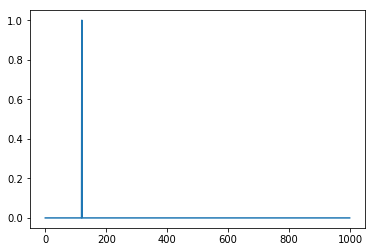

In [2]:
#setup

mockrho = [0]*1000
mockrho[120]=1

#mockrho[320]=1
#for j in range(100):
 #   mockrho[j]=1

Nmu=31
Nw=1000;

mumin=0;
mumax=10
dmu=(mumax-mumin)/Nmu


wmin=0.0001;
wmax=6.;
dw=(wmax-wmin)/Nw;

#Kernel=np.array([[  (1./2. if w == 0 or w== Nw-1 else 1.) * 
#                    dw*np.exp(-(wmin+dw*w)*t)
#                  for w in range(Nw) ] for t in range(1,Nt+1)]);

Kernel=np.array([[  (1./2. if w == 0 or w== Nw-1 else 1.) * 
                    dw*2*(wmin+dw*w)/((wmin+dw*w)**2+(mumin+dmu*mu)**2)
                  for w in range(Nw) ] for mu in range(1,Nmu+1)]);


DataIdeal = np.dot(Kernel,mockrho)

print(DataIdeal.shape)
#plt.yscale('log')
#plt.plot(DataIdeal)
plt.plot(mockrho)

In [3]:
NoisyData = [0]*Nmu

#standard deviation scaling
K=0.01
Nmeas =1000

for i in range(Nmu):
    NoisyData[i]=(np.random.normal(loc=DataIdeal[i],scale=DataIdeal[i]*K*np.sqrt(Nmeas),size=Nmeas))
    
#print(NoisyData)


(array([  7.,  33.,  92., 185., 243., 193., 150.,  65.,  22.,  10.]),
 array([0.00081832, 0.00256759, 0.00431686, 0.00606614, 0.00781541,
        0.00956468, 0.01131396, 0.01306323, 0.01481251, 0.01656178,
        0.01831105]),
 <a list of 10 Patch objects>)

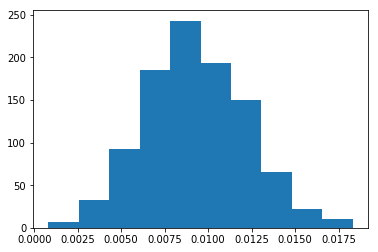

In [4]:
plt.hist(NoisyData[1])

In [5]:
DataAverage = [0]*len(NoisyData)
Variance= [0]*len(NoisyData)

for j in range(len(NoisyData)):
    DataAverage[j]=np.mean(NoisyData[j])
    Variance[j] = np.var(NoisyData[j])
    
print(DataAverage)
print(Variance)

[0.014016227110311785, 0.00925792479070642, 0.005927437207124621, 0.003963921887286116, 0.00279514074303264, 0.002044117104842722, 0.0015223971095247048, 0.001211838925436901, 0.0009751546338686799, 0.0008019751253021981, 0.0006584699007967426, 0.0005472806053702932, 0.0004763326760370882, 0.0004105360788695706, 0.00036025849162839654, 0.00031329933309764735, 0.0002848043766583525, 0.00025349062753109516, 0.00022815483991821557, 0.00020547441685078, 0.0001858780113541346, 0.00016926303256330162, 0.0001568984171486668, 0.0001434783664929078, 0.00013115119473101395, 0.0001230949823568714, 0.00011494350611999523, 0.00010451622600212642, 9.910789104810985e-05, 9.297301491895301e-05, 8.5282091619928e-05]
[1.960864109470054e-05, 8.49026511529263e-06, 3.3783651956891627e-06, 1.5154904533795018e-06, 8.009810749613993e-07, 4.362948600508561e-07, 2.2465769487327871e-07, 1.5266537404483825e-07, 9.500240604587764e-08, 5.655229175649876e-08, 4.3631228466917954e-08, 2.9965632287056045e-08, 2.1859434

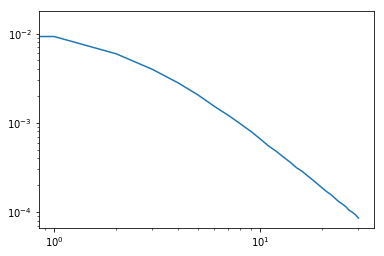

In [6]:
plt.yscale('log')
plt.xscale('log')
plt.plot(DataAverage)
#plt.plot(DataIdeal)

In [8]:
AutoCorrelationCorr=1.; 

#standard covariance expression
DataCovarianceMatrix=AutoCorrelationCorr*np.array([[ sum( np.array([ ( NoisyData[i][n]-DataAverage[i] )*
                                     ( NoisyData[j][n]-DataAverage[j] )/((Nmeas-1.)*Nmeas) for n in range(Nmeas)]) )
                  for i in range(Nmu) ] for j in range(Nmu)]);
print(DataCovarianceMatrix.shape)
print(DataCovarianceMatrix)

(31, 31)
[[ 1.96282694e-08  3.48788612e-10  7.16252539e-10  1.97543717e-10
   1.81586659e-10 -5.79827939e-11 -3.64124585e-11 -1.15259507e-10
  -8.48628032e-12 -3.55907729e-11 -4.53880045e-11  3.38388783e-13
  -2.80103079e-12 -6.49815027e-12  1.07462123e-11 -4.47549817e-12
  -2.91036796e-12 -1.31879902e-12  1.25703735e-11 -3.20142449e-12
   4.65180172e-12  1.51891004e-12 -1.64730027e-12  2.12895701e-12
   1.87546904e-12 -1.47615194e-12  4.67138758e-12  5.80074358e-12
   1.89355541e-12 -1.88253208e-12  6.23903949e-13]
 [ 3.48788612e-10  8.49876388e-09  1.49756433e-10  6.69783828e-11
   8.24042334e-12 -2.74264533e-11 -2.68918713e-12  2.48301870e-11
  -1.92262960e-11  3.56961715e-12  1.08933987e-12  9.44592881e-12
   1.71340678e-11  6.90607410e-12 -7.36383858e-12 -4.51252884e-12
  -9.51034054e-12 -4.97790860e-12 -1.34630069e-11  8.49800135e-12
   5.25804054e-12 -3.29245127e-12  5.68424511e-12  3.08727613e-12
   2.68756704e-12  4.72089496e-12  1.71053149e-12 -7.89471396e-13
   1.98978063e-1

In [9]:
#linalg.eig()returns two objectes diagonal e-value matrix and e-vector matrices
DiagCorrVar,UInv=np.linalg.eig(DataCovarianceMatrix)
print(  UInv.conj().T @ DataCovarianceMatrix @ UInv )


#Transformed varibles
DCDataAvg= UInv.conj().T @ DataAverage;
print(DCDataAvg)

DCKernel= UInv.conj().T @ Kernel;
print(DCKernel)

print(np.sqrt(DiagCorrVar)) 

[[ 1.96761097e-08  6.36583732e-25 -6.90286104e-25  5.68842668e-26
   1.62655427e-25 -1.24567251e-25 -5.02355499e-26  3.21932163e-26
   2.05391770e-26  2.11485720e-26  1.52764886e-26  2.13316617e-27
  -3.18655432e-27  1.59472176e-26  1.71869125e-26  5.55042533e-27
  -2.14136293e-27 -5.60485673e-27 -1.07287055e-26 -5.28852351e-27
   1.55706352e-27 -2.48353134e-27 -1.19275769e-27 -2.24036497e-28
   2.17725610e-27  1.96899682e-27 -9.08767763e-28  2.52435490e-28
   1.09178349e-27 -9.27700425e-28 -7.84127740e-28]
 [ 8.03850187e-25  8.49183537e-09  3.43591740e-24  1.89212370e-24
   8.62723529e-25 -1.28166231e-25  1.57356451e-25  2.10115074e-24
  -2.58845773e-25 -3.82147099e-25  1.30086319e-25  5.03184789e-27
  -3.86977689e-26  1.07286661e-25 -1.28899872e-26  4.80195410e-26
  -7.57361689e-26 -4.63345341e-26  6.30191395e-26  6.80881625e-26
  -8.28737824e-27 -1.62122749e-26  1.27984793e-26 -5.62300053e-27
  -2.03210569e-26 -7.67403889e-27  3.27156395e-26  2.50416006e-26
  -3.14029749e-26 -6.7021

False


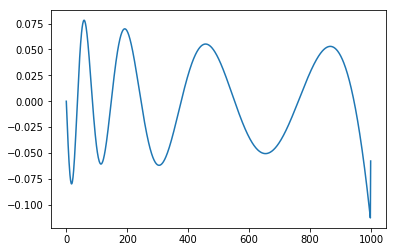

In [11]:
def L(rho, *args):
    data=args[0]
    kernel = args[1]
    sigma = args[2]
    distance = 0
    costf = 0
    rhodat = kernel@rho
    di = [0]*len(data)
    
    for i in range(len(data)):
        di[i]=((data[i]-rhodat[i])**2)/(sigma[i]**(2))
    distance = 0.5*sum(di)
    
    return distance 

def LDer(rho, *args):
    data=args[0]
    kernel = args[1]
    sigma = args[2]
    rhodat = kernel@rho
    
    gradient=[0]*len(rho)
    
    for j in range(len(rho)):
        
        tmp=0;
        
        
        for i in range(len(data)):
            tmp +=((data[i]-rhodat[i]))/(sigma[i]**(2))*(-kernel[i,j])
        gradient[j]=tmp
    
    return np.asarray(gradient)


testrho = [0]*1000

#testrho[130]=1

#for j in range(200):
#    mockrho[j]=1


#bnds = [(0, None)]*1000

#result = optimize.minimize(L, x0=testrho , args=(DCDataAvg,DCKernel,np.sqrt(DiagCorrVar)),method='L-BFGS-B',jac='2-point', bounds = None, options={'gtol':1e-12,'ftol':1e-12,'maxfun':1000000,'disp':True})
result = optimize.minimize(L, x0=testrho , args=(DCDataAvg,DCKernel,np.sqrt(DiagCorrVar)),method='L-BFGS-B',jac=LDer, options={'gtol':1e-12,'ftol': 1e-12,'maxiter':500,'disp':True})
#result = optimize.minimize(L, x0=testrho , args=(DCDataAvg,DCKernel,np.sqrt(DiagCorrVar)),method='BFGS',jac='2-point', options={'gtol':1e-12,'disp':True})



#print(result)
plt.plot(result.x)
#plt.plot(mockrho)
print(result.success)

In [21]:
print(L(result.x,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar)))

9.386667607708883


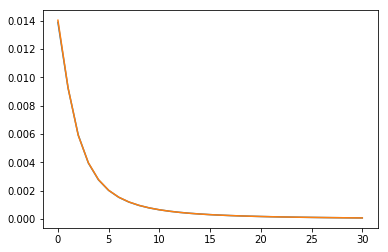

In [12]:
#plt.yscale('log')
plt.plot(DataIdeal)
plt.plot(np.dot(Kernel,result.x))
#plt.plot(np.dot(Kernel,testrho))

In [ ]:
h=1

rho1 = [0]*1000
rho1[2]=h

rho2 = [0]*1000
rho2[2]=0


print((L(rho1,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar))-L(rho2,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar)))/h)

print(LDer(rho1,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar))[2])


In [ ]:
for j in range(1,20):
    h = 1e-4#size of change in rho
    p=j*10   #element of rho to be cahnged
    
    rho1 = [0]*1000
    rho1[p]=h

    rho2 = [0]*1000
    
    #ratio between finite difference derivative and derivative from defined function in p
    print(p , ((L(rho1,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar))-L(rho2,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar)))/h)
          /LDer(rho1,DCDataAvg,DCKernel,np.sqrt(DiagCorrVar))[p])

Noticing that the ration between the finite difference method and the function defined above varies when I change what parameter of rho that is changed. so either accuracy of the finite differnece method changes or something about the function changes.(note: data that DCDataAvg comes from has spike at 120)